<a href="https://colab.research.google.com/github/mertdonmez93/Odevler/blob/main/C_07_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

İkinci proje olan regresyon projesinde kullandığınız veri kümesini tekrar kullanarak XGBoost algoritmasını kullanarak regresyon ve sınıflandırma modelleri oluşturun ve bu model için en uygun parametre değerlerini belirleyin. Projelerinizdeki modellerle karşılaştırın.

# 1. Classification with Light GBM

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

train_data = pd.read_csv('titanic_train.csv')

In [12]:
train_data['is_male'] = pd.get_dummies(train_data['Sex'],drop_first = True)
train_data.drop(labels='Sex', axis=1, inplace=True)  

# C = Cherbourg
# S = Southampton
# Q = Queenstown
train_data.Embarked = train_data.Embarked.replace('C', 1)
train_data.Embarked = train_data.Embarked.replace('Q', 2)
train_data.Embarked = train_data.Embarked.replace('S', 3)
train_data.Embarked = train_data.Embarked.replace(np.nan, 0)

train_data.dropna(subset=['Age'], how='all', inplace=True)

In [13]:
df = train_data[['Pclass','is_male','Age','Fare','Embarked','Survived']]

In [14]:
df

,Pclass,is_male,Age,Fare,Embarked,Survived
0,3,1,22.00,7.2500,3.0,0
1,1,0,38.00,71.2833,1.0,1
2,3,0,26.00,7.9250,3.0,1
3,1,0,35.00,53.1000,3.0,1
4,3,1,35.00,8.0500,3.0,0
6,1,1,54.00,51.8625,3.0,0
7,3,1,2.00,21.0750,3.0,0
8,3,0,27.00,11.1333,3.0,1
9,2,0,14.00,30.0708,1.0,1
10,3,0,4.00,16.7000,3.0,1


In [15]:
X = df[['Pclass','is_male','Age','Fare','Embarked']]
y = df['Survived']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
import lightgbm as lgb

In [18]:
d_train = lgb.Dataset(x_train, label=y_train)

In [19]:
params = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 10,
          'force_row_wise':True,
          'verbose': -1
          ,
         }

In [20]:
lgb_model = lgb.train(params, d_train, num_boost_round = 100, verbose_eval=False)

In [21]:
y_tahmin=lgb_model.predict(x_test)
y_tahmin[:10]

array([0.5000905 , 0.89310398, 0.73780645, 0.2078731 , 0.4341527 ,
       0.08766738, 0.4332964 , 0.44071082, 0.34459863, 0.36095563])

In [22]:
y_tahmin = [0 if tahmin < 0.5 else 1 for tahmin in y_tahmin]
y_tahmin[:10]

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [23]:
from sklearn.metrics import accuracy_score
dogruluk=accuracy_score(y_tahmin,y_test)
dogruluk

0.8100558659217877

# 2. Regression with XGBoost

In [25]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")

In [26]:
import pandas as pd
import xgboost as xgb
import numpy as np

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [27]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

houseprices_df = house_prices_df.interpolate(method ='linear', limit_direction ='forward')

df_prices = houseprices_df.filter(['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea','YearBuilt','SalePrice'], axis=1)

# Y is the target variable
y1 = df_prices['SalePrice']
# X is the feature set
X1 = df_prices[['OverallQual','TotalBsmtSF','GrLivArea','GarageCars']]

In [28]:
X1_train, X1_test, y1_train, y1_test =  train_test_split(X1, y1, test_size=0.20, random_state=111)

In [30]:
d_train = lgb.Dataset(X1_train, label=y1_train)

In [31]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'num_leaves':128,
    'force_row_wise':True,
    'verbose': -1}
n_estimators = 100

In [33]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)
y1_tahmin = lgb_reg_model.predict(X1_test)
y1_tahmin_train = lgb_reg_model.predict(X1_train)

rmse = np.sqrt(mean_squared_error(y1_test, y1_tahmin))
print("RMSE: %f" % (rmse))

RMSE: 34550.256990


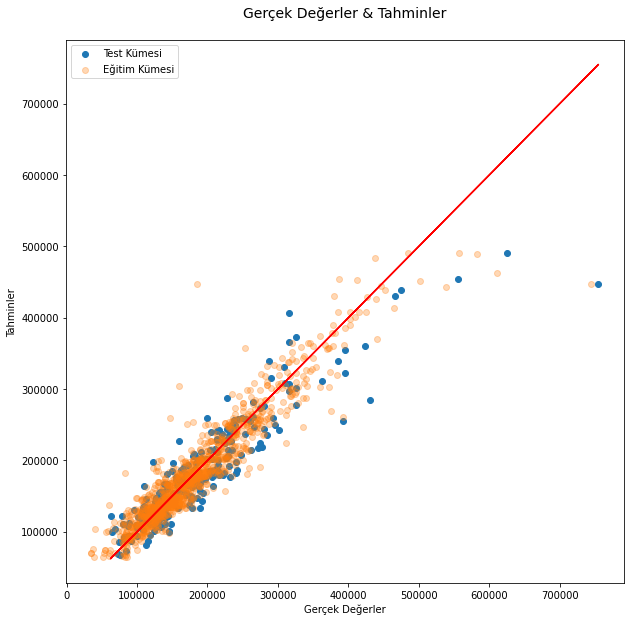

In [34]:
plt.figure(figsize=(10,10))
plt.title('Gerçek Değerler & Tahminler\n', size = 14)
ax1 = plt.scatter(y1_test, y1_tahmin)
ax2 = plt.scatter(y1_train, y1_tahmin_train,alpha=0.30)
ax3 = plt.plot(y1_test, y1_test, color="red")
plt.legend((ax1, ax2), ('Test Kümesi', 'Eğitim Kümesi'))
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.show()